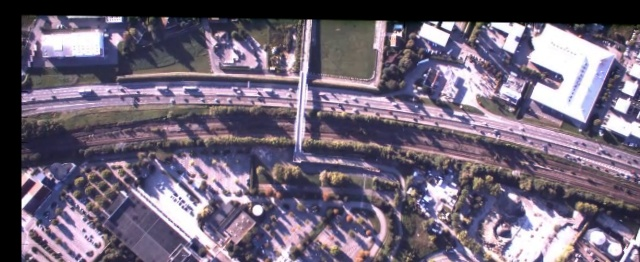

In [4]:
from SensorsVideoRegistration import *
from IPython.display import clear_output, Image, display, HTML


video = cv2.VideoCapture( 'example_videos/descending.mp4' )  # replace by 'example_videos/mocopo.mp4' to see the second example


display_handle=display(None, display_id=True)

# initialize the stabilization
VStab = StabilizerHomographyTrajCorrected()

# loop through the video
try:
    while True:
        # read the video
        ret, frame = video.read()
        if not ret:
            break
        
        # calculate the registration
        H, flag = VStab.stabilize(frame)
        
        # register accordingly to the output
        warpedF = cv2.warpPerspective(frame, H, (frame.shape[1],frame.shape[0]))
        
        # display the result
        _, warpedFDisp = cv2.imencode('.jpeg', warpedF)
        display_handle.update(Image(data=warpedFDisp.tobytes()))

except KeyboardInterrupt:
    pass
finally:
    video.release()